In [1]:
import pandas as pd

# Cargar el dataset
file_path = 'ensadul2021SelcolClustered.csv'
data = pd.read_csv(file_path, sep=';')

# Visualizar las primeras filas y la información del DataFrame
data_head = data.head()
data_info = data.info()

data_head, data_info



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5745 entries, 0 to 5744
Data columns (total 50 columns):
 #   Column                                                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                                                             --------------  -----  
 0   Folio                                                                                                                                                                              5745 non-null   object 
 1   Folio de integrante                                                                                                                                                                5745 non-null   object 
 2   Region o zona de trabajo                                

(           Folio Folio de integrante Region o zona de trabajo  \
 0  2021_01001019    2021_01001019_02             Centro_Norte   
 1  2021_01001019    2021_01001019_03             Centro_Norte   
 2  2021_01001021    2021_01001021_02             Centro_Norte   
 3  2021_01001031    2021_01001031_04             Centro_Norte   
 4  2021_01001105    2021_01001105_03             Centro_Norte   
 
             DESC_ENT  Edad del Seleccionado  \
 0  01 AGUASCALIENTES                     42   
 1  01 AGUASCALIENTES                     21   
 2  01 AGUASCALIENTES                     48   
 3  01 AGUASCALIENTES                     24   
 4  01 AGUASCALIENTES                     42   
 
   ASEXO ¿Cuál es el sexo de (NOMBRE) ?  \
 0                                Mujer   
 1                               Hombre   
 2                               Hombre   
 3                                Mujer   
 4                                Mujer   
 
   ¿Qué edad tenía cuando le diagnosticaron obesidad

In [2]:
# Convertir las columnas de interés a tipos de datos adecuados para el análisis
data['IMC'] = pd.to_numeric(data['IMC'], errors='coerce')
data['Cluster'] = pd.to_numeric(data['Cluster'], errors='coerce')

# Eliminar posibles valores nulos en las columnas de IMC y Cluster
data_clean = data.dropna(subset=['IMC', 'Cluster'])

# Calcular el promedio de IMC por cluster
average_imc_per_cluster = data_clean.groupby('Cluster')['IMC'].mean().sort_values(ascending=False)

average_imc_per_cluster



Cluster
6     31.376853
7     30.333217
5     30.160493
1     28.889835
8     28.778496
4     28.742355
10    28.423762
2     27.775829
0     27.320749
9     26.786451
3     26.725028
Name: IMC, dtype: float64

In [3]:

# Identificar clusters con obesidad (IMC promedio >= 30)
clusters_with_obesity = average_imc_per_cluster[average_imc_per_cluster >= 30]

clusters_with_obesity



Cluster
6    31.376853
7    30.333217
5    30.160493
Name: IMC, dtype: float64

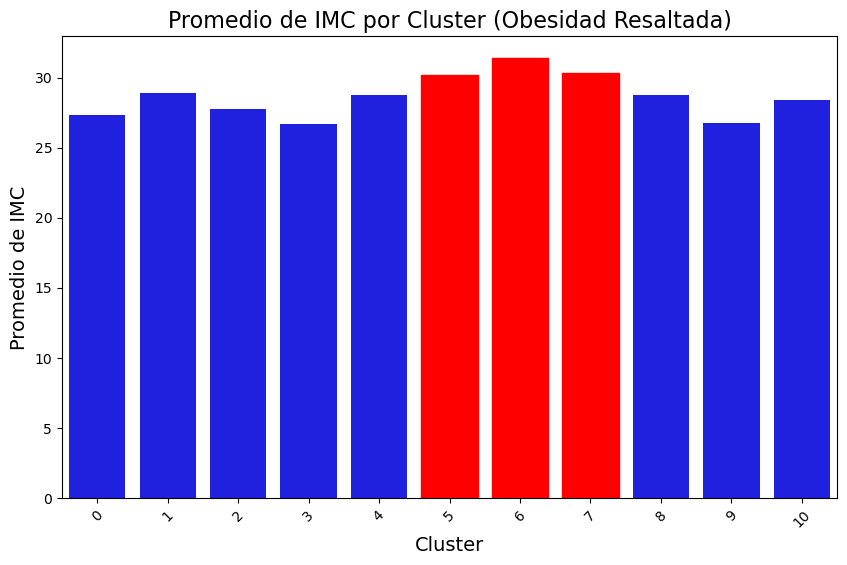

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


# Colores para el gráfico: rojo para clusters con obesidad, azul para los demás
colors = ['blue']

# Crear el gráfico de barras con colores personalizados
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=average_imc_per_cluster.index, y=average_imc_per_cluster.values, palette=colors)
plt.title('Promedio de IMC por Cluster (Obesidad Resaltada)', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Promedio de IMC', fontsize=14)
plt.xticks(rotation=45)


# Resaltar en rojo los clusters con obesidad
for i, bar in enumerate(bar_plot.patches):
    if i in clusters_with_obesity.index:
        bar.set_color('red')


plt.show()



In [5]:
# Aislar el Cluster 6 en un nuevo dataset
cluster_7_data = data_clean[data_clean['Cluster'] == 7]

# Verificando las primeras filas del nuevo dataset
cluster_7_head = cluster_7_data.head()

cluster_7_head




,Folio,Folio de integrante,Region o zona de trabajo,DESC_ENT,Edad del Seleccionado,ASEXO ¿Cuál es el sexo de (NOMBRE) ?,¿Qué edad tenía cuando le diagnosticaron obesidad?,Durante la última semana...¿Sentía como si no pudiera quitarse de encima la tristeza?,Durante la última semana...¿se sintió deprimido/a?,Durante la última semana...¿no durmió bien?,...,A1516 ¿Con qué frecuencia se siente aislado de los demás?,Estrato urbanidad/ruralidad,Region,INT_H0317A ¿Cuál es el último año o grado que aprobó (USTED/NOMBRE) en la escuela? NIVEL,INT_H0903 ¿USTED/NOMBRE realizaba algún deporte o actividad física antes de la pandemia por COVID-19?,"INT_H0905 En comparación al tiempo que pasaba sentado(a) o reclinado(a) de forma habitual antes de la pandemia por COVID-19, actualmente este tiempo…",ALTURA_NUM,PESO_NUM,IMC,Cluster
15,2021_01002005,2021_01002005_02,Centro_Norte,01 AGUASCALIENTES,42,Mujer,,Un número de veces conside-rable (3-4 dias).,Todo el tiempo o la mayoría del tiempo (5-7...,Todo el tiempo o la mayoría del tiempo (5-7...,...,,"Urbano ( 2500-99,999 Hab)",Resto Centro Norte,Licenciatura o profesional,Sí,aumentó?,161.5,65,24.921163,7
20,2021_02001027,2021_02001027_02,Pacifico_Norte,02 BAJA CALIFORNIA,54,Mujer,52,Pocas veces o alguna vez (1-2 días).,Rara vez o nunca (menos de un día).,Todo el tiempo o la mayoría del tiempo (5-7...,...,,Metropolitano (100mil y + Hab),Pacifico-Norte,Secundaria,No,fue igual?,148.6,80,36.228668,7
22,2021_02002055,2021_02002055_01,Pacifico_Norte,02 BAJA CALIFORNIA,53,Hombre,45,Rara vez o nunca (menos de un día).,Rara vez o nunca (menos de un día).,Rara vez o nunca (menos de un día).,...,,Metropolitano (100mil y + Hab),Pacifico-Norte,Secundaria,No,aumentó?,175.7,102,33.041264,7
37,2021_03001024,2021_03001024_01,Pacifico_Norte,03 BAJA CALIFORNIA SUR,55,Hombre,,Rara vez o nunca (menos de un día).,Rara vez o nunca (menos de un día).,Todo el tiempo o la mayoría del tiempo (5-7...,...,,"Urbano ( 2500-99,999 Hab)",Pacifico-Norte,Licenciatura o profesional,Sí,fue igual?,166.5,73,26.332639,7
46,2021_03002026,2021_03002026_01,Pacifico_Norte,03 BAJA CALIFORNIA SUR,59,Mujer,,Pocas veces o alguna vez (1-2 días).,Pocas veces o alguna vez (1-2 días).,Pocas veces o alguna vez (1-2 días).,...,,"Urbano ( 2500-99,999 Hab)",Pacifico-Norte,Estudios técnicos o comerciales con preparator...,Sí,aumentó?,150.5,70,30.904736,7


In [6]:
# Cargar el nuevo dataset normalizado
file_path_normalized = 'ensadul2021_Clustered.csv'
data_normalized = pd.read_csv(file_path_normalized, sep=';')

# Convertir la columna 'Cluster' a tipo numérico y aislar el Cluster 6
data_normalized['Cluster'] = pd.to_numeric(data_normalized['Cluster'], errors='coerce')
cluster_7_normalized = data_normalized[data_normalized['Cluster'] == 7]

# Verificar las primeras filas del nuevo dataset normalizado para el Cluster 6
cluster_7_normalized_head = cluster_7_normalized.head()

cluster_7_normalized_head



,Region o zona de trabajo,DESC_ENT,Edad del Seleccionado,ASEXO ¿Cuál es el sexo de (NOMBRE) ?,Durante la última semana...¿Sentía como si no pudiera quitarse de encima la tristeza?,Durante la última semana...¿se sintió deprimido/a?,Durante la última semana...¿no durmió bien?,A1405 ¿Tiene dificultad para caminar o subir escalones?,"A1407 ¿Tiene dificultad para el cuidado propio, tal como lavarse todo el cuerpo o vestirse?","A1408 Usando su idioma habitual, ¿tiene dificultad para comunicarse, por ejemplo, entender a otros o hacerse entender?",...,Region_Guanajuato,Region_Pacifico-Norte,Region_Pacífico Sur,Region_Pacífico-Centro,Region_Península,Region_Resto Centro Norte,"INT_H0905 En comparación al tiempo que pasaba sentado(a) o reclinado(a) de forma habitual antes de la pandemia por COVID-19, actualmente este tiempo…_aumentó?","INT_H0905 En comparación al tiempo que pasaba sentado(a) o reclinado(a) de forma habitual antes de la pandemia por COVID-19, actualmente este tiempo…_disminuyó?","INT_H0905 En comparación al tiempo que pasaba sentado(a) o reclinado(a) de forma habitual antes de la pandemia por COVID-19, actualmente este tiempo…_fue igual?",Cluster
15,4,1,42,2,1.0,1.0,1.0,1,1.0,1,...,0,0,0,0,0,1,1,0,0,7
20,1,2,54,2,2.0,1.0,1.0,1,1.0,1,...,0,1,0,0,0,0,0,0,1,7
22,1,2,53,1,1.0,1.0,1.0,1,1.0,1,...,0,1,0,0,0,0,1,0,0,7
37,1,3,55,1,1.0,1.0,1.0,1,1.0,1,...,0,1,0,0,0,0,0,0,1,7
46,1,3,59,2,2.0,2.0,2.0,2,1.0,1,...,0,1,0,0,0,0,1,0,0,7


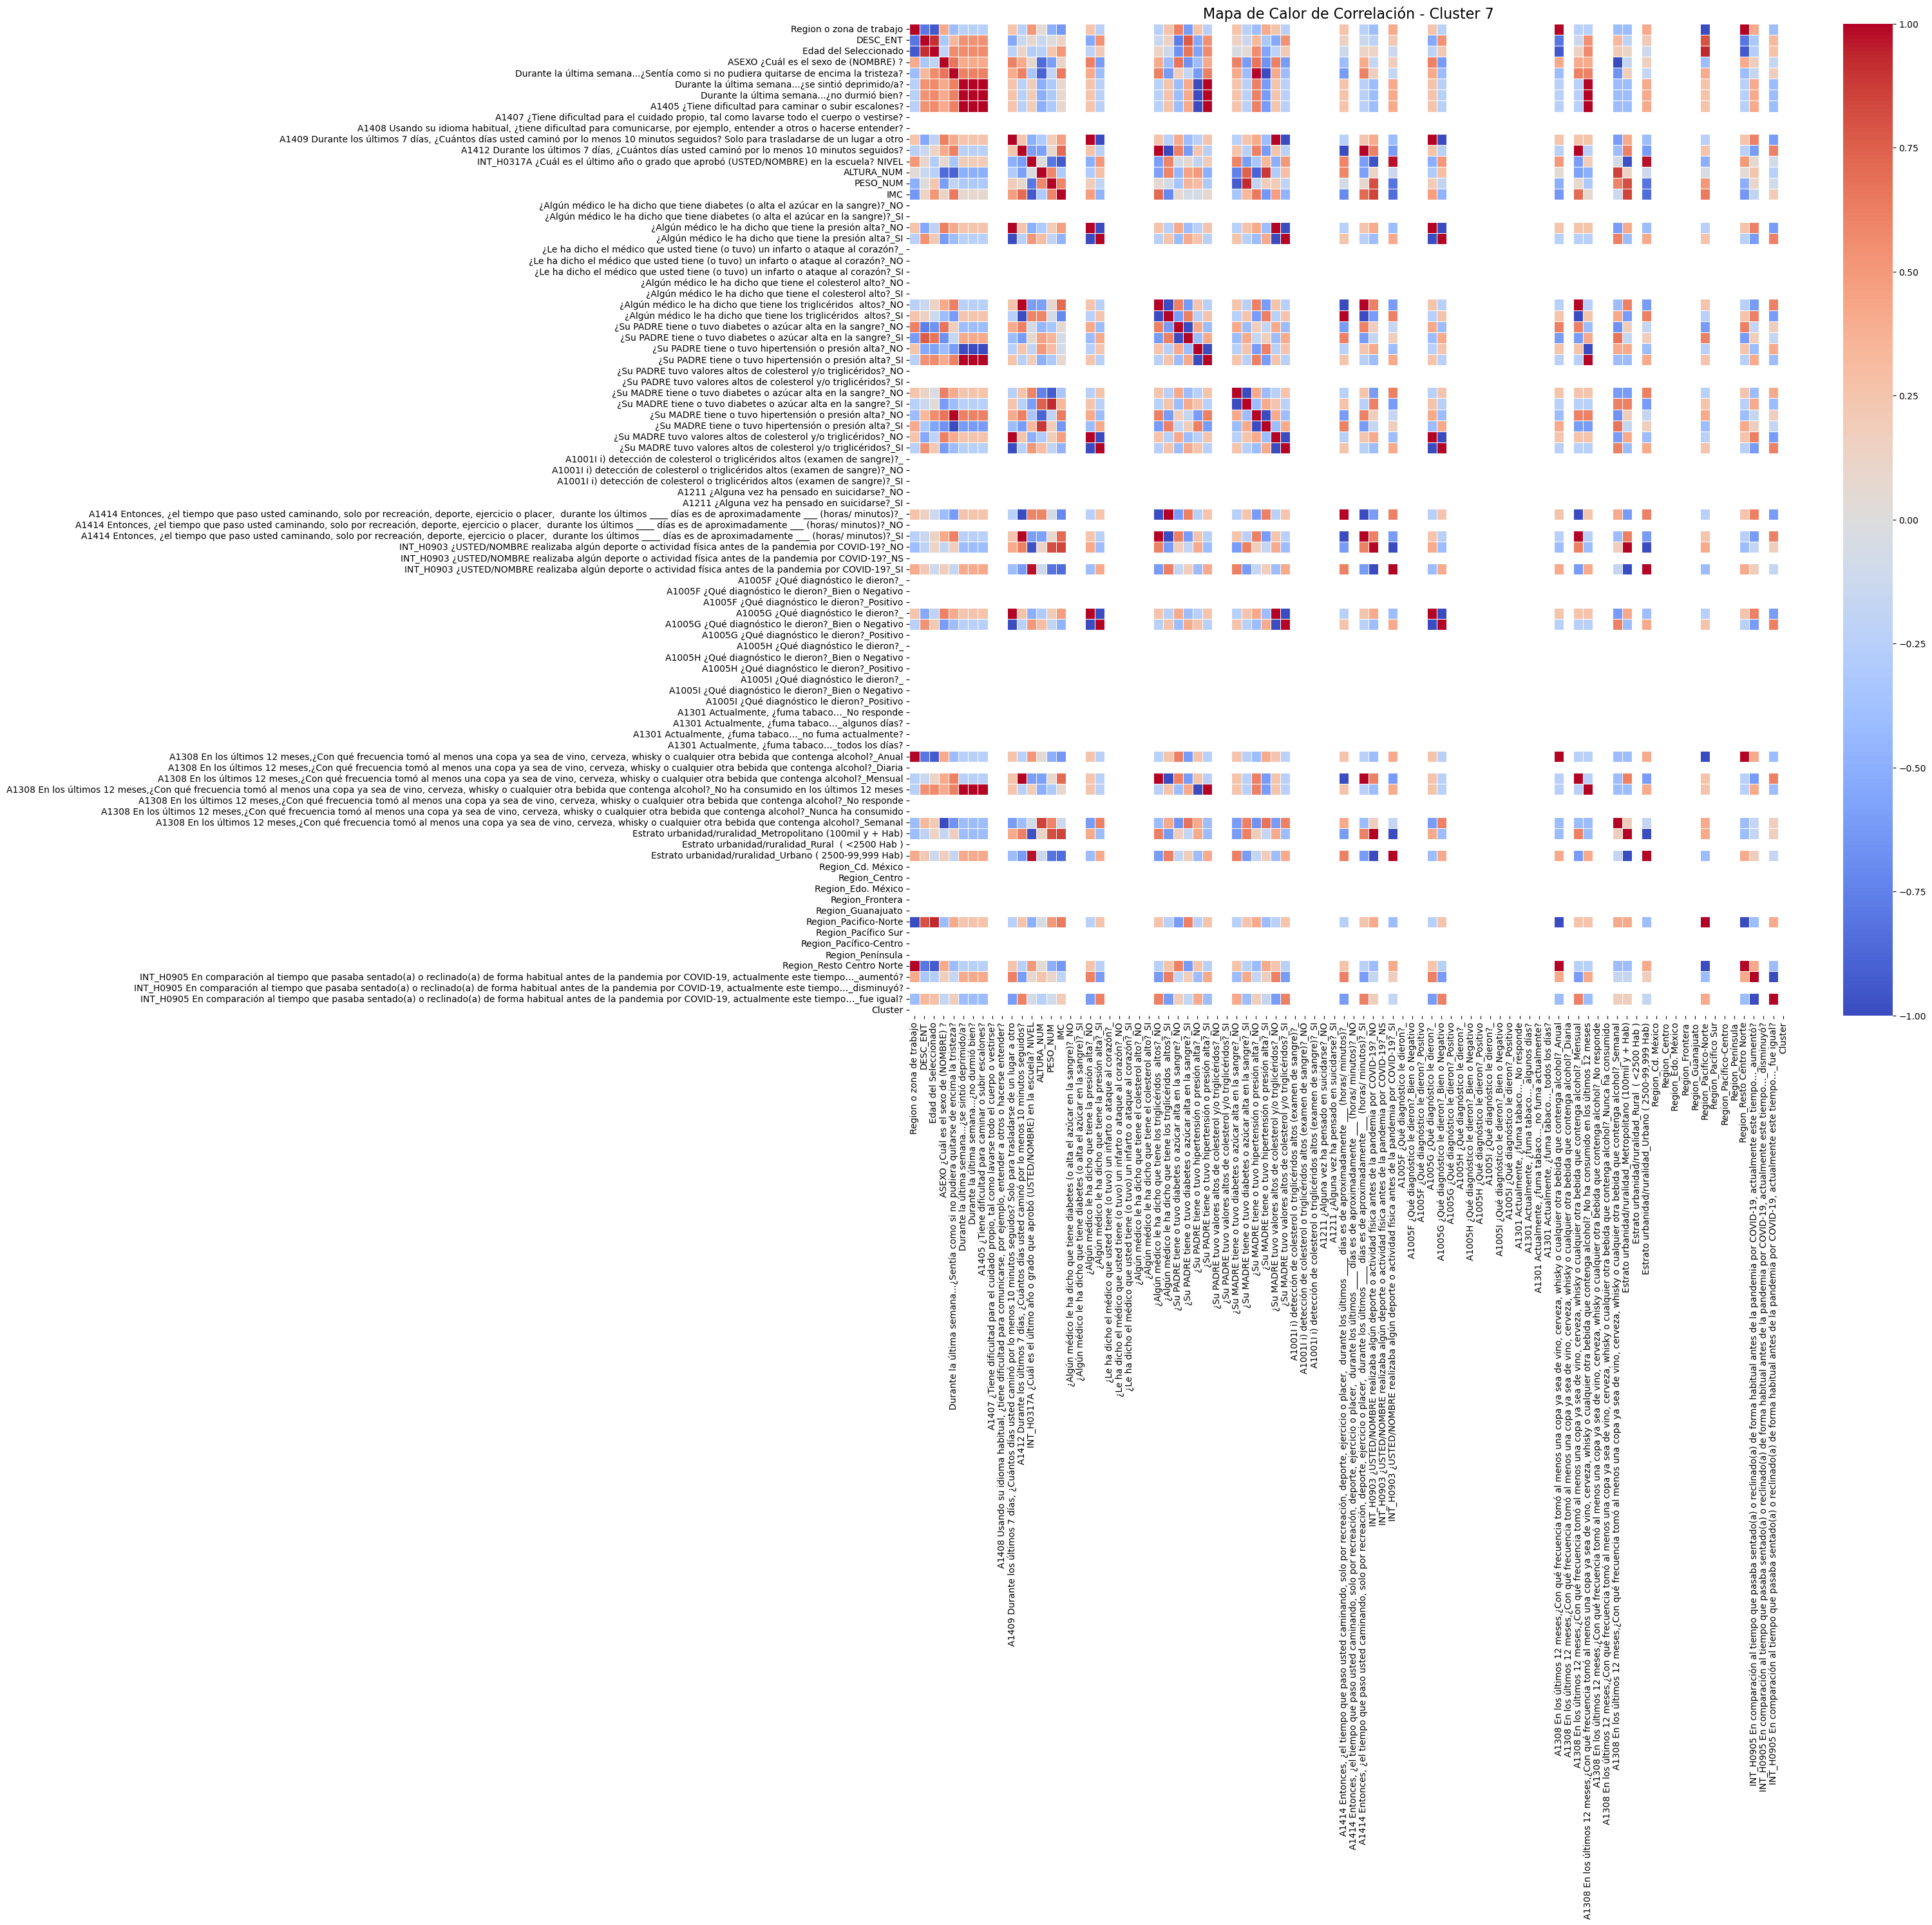

In [7]:
import numpy as np

# Filtrar el dataset para incluir solo las columnas numéricas
numeric_data = cluster_7_normalized_head.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = numeric_data.corr()

# Crear el mapa de calor de correlación
plt.figure(figsize=(22, 20))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Mapa de Calor de Correlación - Cluster 7', fontsize=16)
plt.show()



In [8]:
# Guardar la matriz de correlación en un archivo CSV
csv_file_path = 'cluster_7_correlation_matrix.csv'
correlation_matrix.to_csv(csv_file_path)

csv_file_path



'cluster_7_correlation_matrix.csv'

In [15]:

# Extraer las correlaciones del IMC con las demás variables
imc_correlations = correlation_matrix['IMC']

# Ordenar las correlaciones de mayor a menor (en valor absoluto) para identificar las más fuertes
imc_correlations_sorted = imc_correlations.abs().sort_values(ascending=False)

imc_correlations_sorted.head(10)



IMC                                                                                                                                                                                     1.000000
INT_H0317A ¿Cuál es el último año o grado que aprobó (USTED/NOMBRE) en la escuela? NIVEL                                                                                                0.930796
INT_H0903 ¿USTED/NOMBRE realizaba algún deporte o actividad física antes de la pandemia por COVID-19?_SI                                                                                0.847922
Estrato urbanidad/ruralidad_Urbano ( 2500-99,999 Hab)                                                                                                                                   0.847922
Estrato urbanidad/ruralidad_Metropolitano (100mil y + Hab)                                                                                                                              0.847922
INT_H0903 ¿USTED/NOMBRE realizaba a

In [17]:
# Filtrar las correlaciones por aquellas mayores a 0.30 o menores a -0.30
significant_correlations = imc_correlations[(imc_correlations > 0.40) | (imc_correlations < -0.40)]

# Ordenar las correlaciones filtradas
significant_correlations_sorted = significant_correlations.sort_values(ascending=False)

# Convertir a formato de tabla (DataFrame)
significant_correlations_table = significant_correlations_sorted.reset_index()
significant_correlations_table.columns = ['Variable', 'Correlación con IMC']

significant_correlations_table



,Variable,Correlación con IMC
0,IMC,1.000000
1,INT_H0903 ¿USTED/NOMBRE realizaba algún deport...,0.847922
2,Estrato urbanidad/ruralidad_Metropolitano (100...,0.847922
3,¿Algún médico le ha dicho que tiene los trigli...,0.709510
4,"A1414 Entonces, ¿el tiempo que paso usted cami...",0.709510
5,"A1308 En los últimos 12 meses,¿Con qué frecuen...",0.709510
6,"A1412 Durante los últimos 7 días, ¿Cuántos día...",0.709510
7,Region_Pacifico-Norte,0.640452
8,¿Su MADRE tiene o tuvo hipertensión o presión ...,0.639656
9,Durante la última semana...¿Sentía como si no ...,0.639656
